In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# t-distributed Stochastic Neighbor Embedding (t-SNE)

It is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the distance between low-dimensional embedding and the high-dimensional data. t-SNE tries to keep neighborhood point as close as possible and non-neighborhood point as far away from possible. Used for dimensionality reduction applications (unsupervised learning).

Two most important parameters of T-SNE:
1. Perplexity: Number of points whose distances you want to preserve in a low dimensional space.
2. Step size: number of iterations. 
At every iteration, the algorithm tries to reach a better solution.


Note: When the value of perplexity is small, suppose 3, then only 3 neighborhood point distance is preserved in a low dimensional space. For a stable result, you must choose multiple perplexity values where perplexity is less than the number of data points and also run the algorithm for longer times.

Website: https://distill.pub/2016/misread-tsne/


In [ ]:
##Importing files from the computer when using google colab
from google.colab import files
uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [2]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

d0 = pd.read_csv('mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


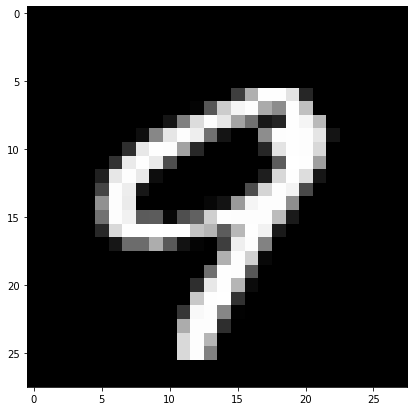

9


In [4]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [5]:
# Pick first 15K data-points to work on for time-effeciency.
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [6]:
# Data-preprocessing: Standardizing the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [7]:
from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000


In [9]:
tsne_data = model.fit_transform(data_1000) #train

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


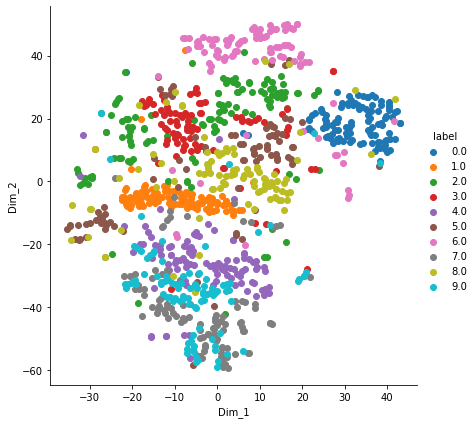

In [10]:
# ploting the 2d data points with seaborn
import seaborn as sn
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


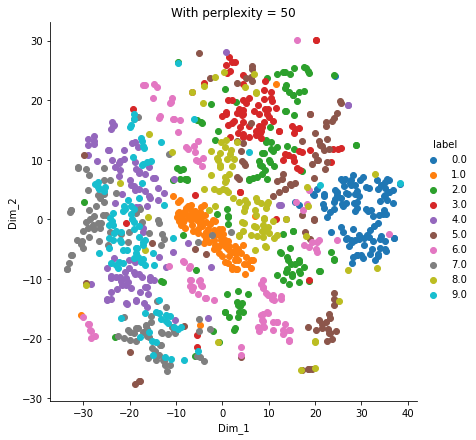

In [11]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


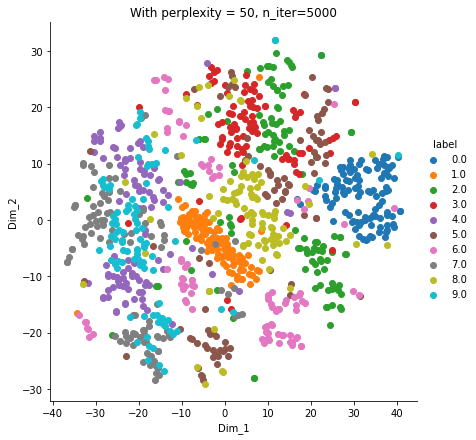

In [12]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


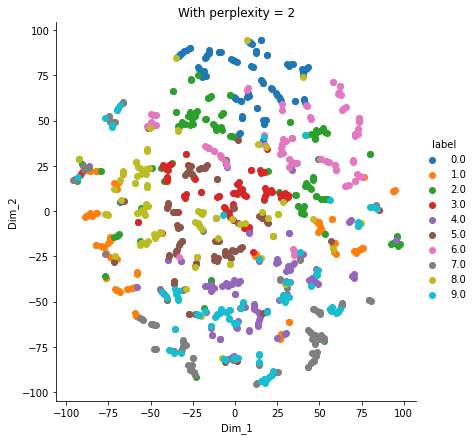

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

# Practice Exercise 1: 

Run the same analysis using all the data points having various values of perplexity and iterations.

# Practice Exercise 2:

Visit the Website: https://distill.pub/2016/misread-tsne/,
        
Try changing different parameters such as Points per cluster, dimensions, perplexity, and Epsilon

Analyze your results.

In [ ]:
#References:
###https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#https://ranasinghiitkgp.medium.com/t-sne-visualization-of-high-dimension-mnist-dataset-48fb23d1bafd
